In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

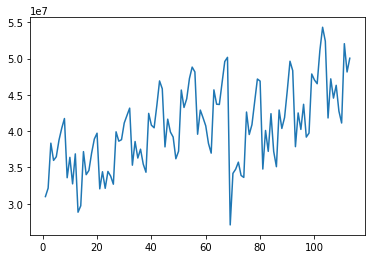

In [16]:
airmiles = pd.read_csv('../Datasets/airmiles.csv', index_col=0)
plt.plot(airmiles)

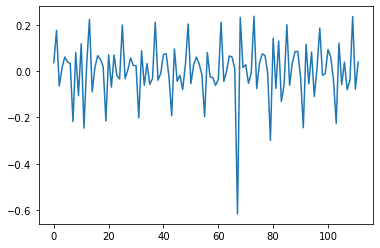

In [27]:
plt.plot((np.log(airmiles.airmiles.values[1:]) - np.log(airmiles.airmiles.values[:-1])))

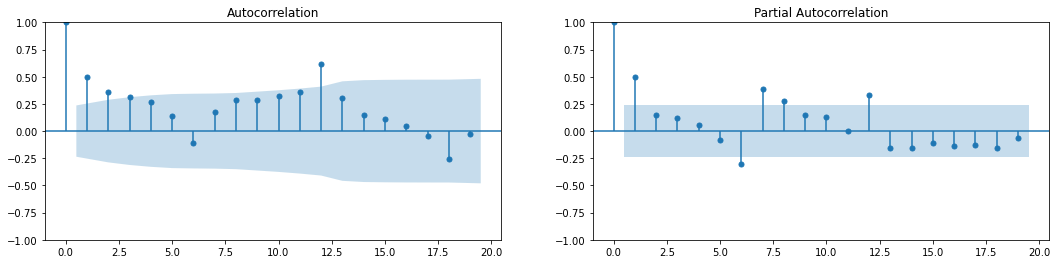

In [64]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(np.log(airmiles).iloc[:69], ax=ax[0])
plot_pacf(np.log(airmiles).iloc[:69], method='ywm', ax=ax[1]);

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


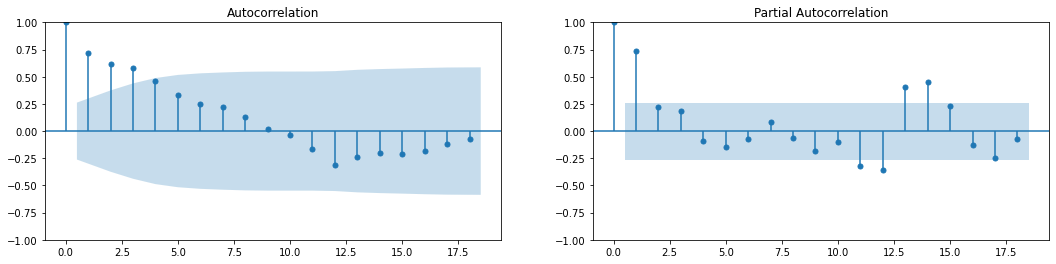

In [65]:
seasonal_dif = np.log(airmiles).iloc[:68].diff(12)
fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(seasonal_dif.dropna(), ax=ax[0])
plot_pacf(seasonal_dif.dropna(), ax=ax[1]);

In [81]:
exog = np.zeros(len(airmiles))
exog[68] = 1

model = SARIMAX(endog = np.log(airmiles.airmiles), exog = exog, order=(1,0,1), seasonal_order = (2,1,0,12))
model_fit = model.fit(disp=False,method='bfgs')
print(model_fit.summary())

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            airmiles   No. Observations:                  113
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                 176.251
Date:                             Thu, 02 Jun 2022   AIC                           -340.503
Time:                                     10:30:39   BIC                           -324.812
Sample:                                          0   HQIC                          -334.150
                                             - 113                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2611      0.014    -18.392      0.000      -0.289      -0.233
ar.L1          0.9443      

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
model_noint = SARIMAX(endog = np.log(airmiles.airmiles), order=(1,0,1), seasonal_order = (1,1,0,12))
model_noint_fit = model_noint.fit(disp=False,method='bfgs')
print(model_fit.summary())

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            airmiles   No. Observations:                  113
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                 176.251
Date:                             Thu, 02 Jun 2022   AIC                           -340.503
Time:                                     10:30:40   BIC                           -324.812
Sample:                                          0   HQIC                          -334.150
                                             - 113                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2611      0.014    -18.392      0.000      -0.289      -0.233
ar.L1          0.9443      

In [88]:
exog = np.zeros([len(airmiles),3])
exog[68,0] = 1
exog[69,1] = 1
exog[70,2] = 1

model_arexog = SARIMAX(endog = np.log(airmiles.airmiles), exog = exog, order=(1,0,1), seasonal_order = (2,1,0,12))
model_arexog_fit = model_arexog.fit(disp=False,method='bfgs')
print(model_fit.summary())

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            airmiles   No. Observations:                  113
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                 189.104
Date:                             Thu, 02 Jun 2022   AIC                           -362.209
Time:                                     10:57:56   BIC                           -341.288
Sample:                                          0   HQIC                          -353.739
                                             - 113                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3212      0.015    -21.124      0.000      -0.351      -0.291
x2            -0.1613      

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


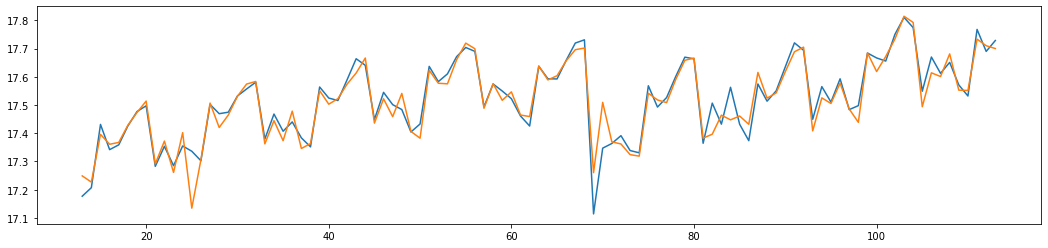

In [83]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(np.log(airmiles[12:]))
ax.plot(model_fit.fittedvalues[12:])

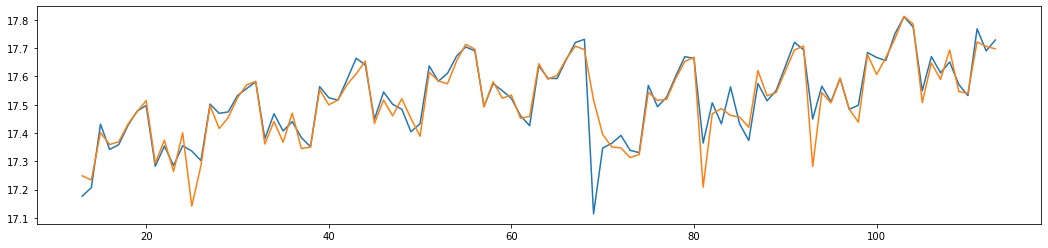

In [91]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(np.log(airmiles[12:]))
ax.plot(model_noint_fit.fittedvalues[12:])

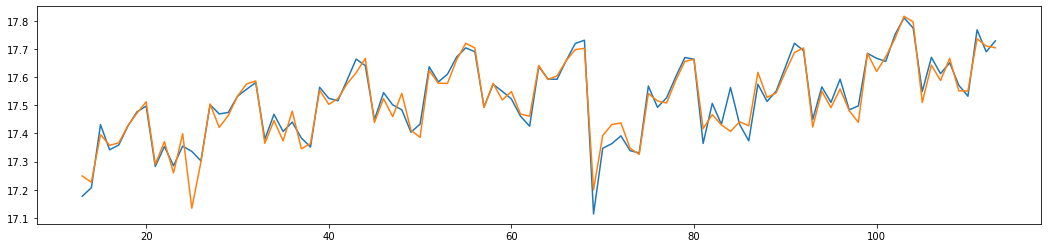

In [90]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(np.log(airmiles[12:]))
ax.plot(model_arexog_fit.fittedvalues[12:])